In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_df = pd.read_csv('user_interactions.csv')
purchase_df = pd.read_csv('purchase_data.csv')
performance_df = pd.read_csv('website_performance.csv')

In [3]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [4]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [5]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            12 non-null     object 
 1   Page_Load_Time   12 non-null     float64
 2   Bounce_Rate      12 non-null     float64
 3   Conversion_Rate  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [6]:
user_df.isnull().sum()

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64

In [7]:
purchase_df.isnull().sum()

Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64

In [8]:
performance_df.isnull().sum()

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64

In [9]:
purchase_df['Purchase_Time']=pd.to_datetime(purchase_df['Purchase_Time'])

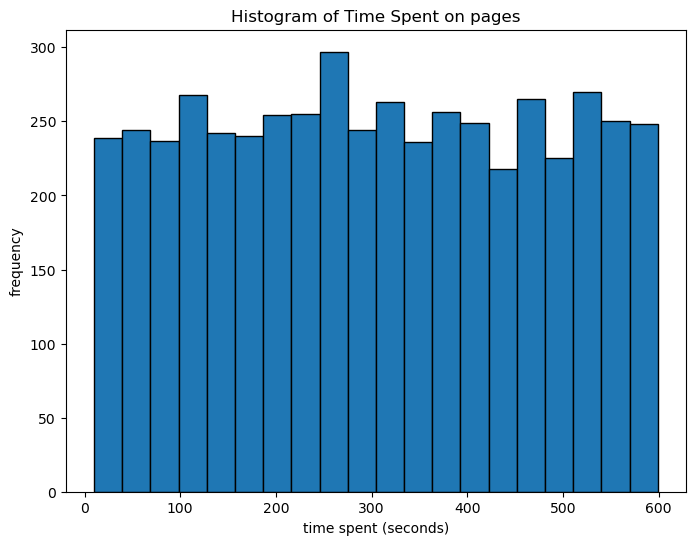

In [10]:
plt.figure(figsize=(8,6))
plt.hist(user_df['Time_Spent_Seconds'],bins=20,edgecolor='k')
plt.title('Histogram of Time Spent on pages')
plt.xlabel('time spent (seconds)')
plt.ylabel('frequency')
plt.show()

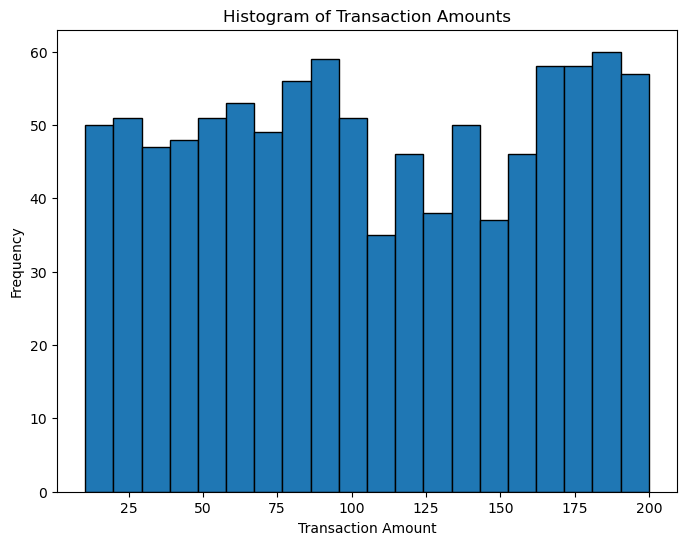

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(purchase_df['Transaction_Amount'], bins=20, edgecolor='k')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

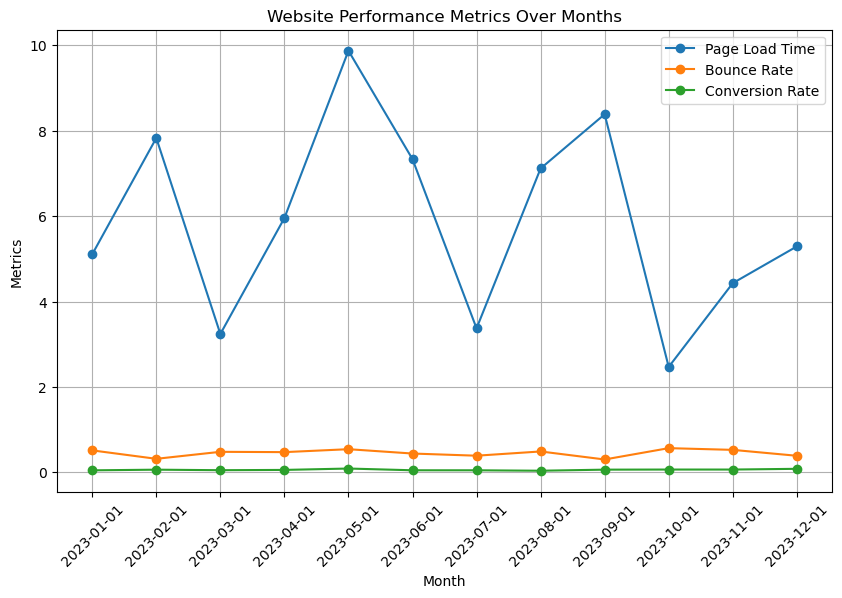

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(performance_df['Month'], performance_df['Page_Load_Time'], marker='o', label='Page Load Time')
plt.plot(performance_df['Month'], performance_df['Bounce_Rate'], marker='o', label='Bounce Rate')
plt.plot(performance_df['Month'], performance_df['Conversion_Rate'], marker='o', label='Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.title('Website Performance Metrics Over Months')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [13]:
user_df['Time_Spent_Minutes'] = user_df['Time_Spent_Seconds'] / 60
user_df.drop(columns=['Time_Spent_Seconds'], inplace=True)
user_df.head()

,User_ID,Page_Viewed,Time_Spent_Minutes
0,User_3198,Homepage,9.333333
1,User_126,Category Page,2.800000
2,User_1376,Category Page,2.033333
3,User_1117,Cart Page,5.483333
4,User_3683,Category Page,6.516667


In [14]:
performance_df['Month']=pd.to_datetime(performance_df['Month'])
performance_df.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [15]:
page_views_grouped = user_df.groupby('Page_Viewed').agg(
    total_page_views=('Page_Viewed', 'count'),
    average_time_spent=('Time_Spent_Minutes', 'mean')
).reset_index()

In [16]:
page_views_grouped.sort_values(by='total_page_views', ascending=False, inplace=True)


In [17]:
page_views_grouped

,Page_Viewed,total_page_views,average_time_spent
3,Homepage,1045,5.170255
0,Cart Page,1041,5.046990
2,Checkout Page,989,5.112673
1,Category Page,972,4.963992
4,Product Page,953,5.076041


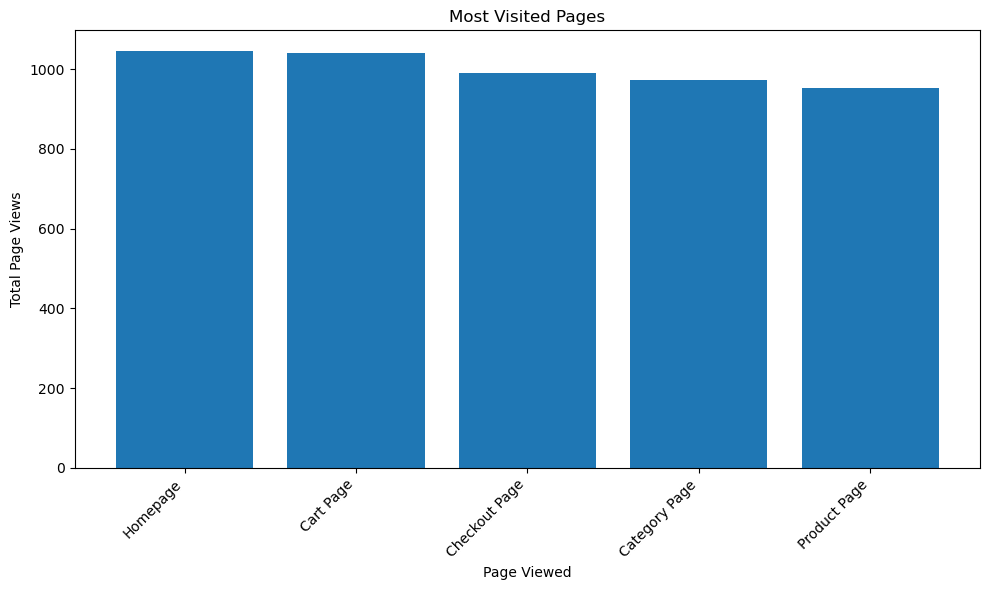

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(page_views_grouped['Page_Viewed'], page_views_grouped['total_page_views'])
plt.title('Most Visited Pages')
plt.xlabel('Page Viewed')
plt.ylabel('Total Page Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

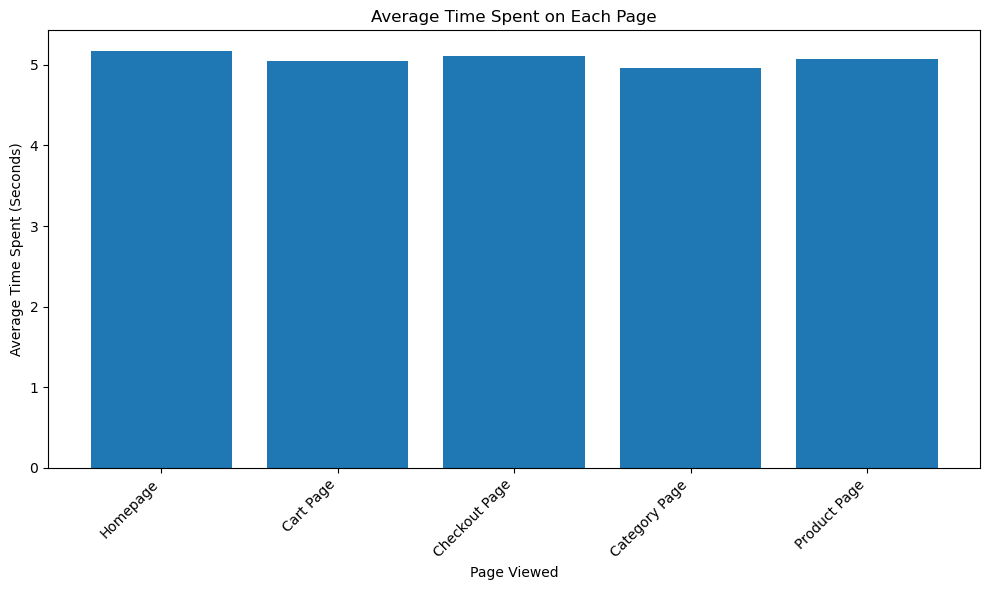

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(page_views_grouped['Page_Viewed'], page_views_grouped['average_time_spent'])
plt.title('Average Time Spent on Each Page')
plt.xlabel('Page Viewed')
plt.ylabel('Average Time Spent (Seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
sections_to_analyze = ['Homepage', 'Category_A', 'Category_B']

In [21]:
section_page_views = user_df[user_df['Page_Viewed'].isin(sections_to_analyze)]
section_page_views_counts = section_page_views['Page_Viewed'].value_counts()

In [22]:
section_clicks = section_page_views[section_page_views['Page_Viewed'] == 'Click']
section_clicks_counts = section_clicks['Page_Viewed'].value_counts()

In [23]:
click_through_rate = (section_clicks_counts / section_page_views_counts) * 100
click_through_rate

Homepage   NaN
Name: Page_Viewed, dtype: float64

In [24]:
print("Click-Through Rate for Different Sections:")
print(click_through_rate)

Click-Through Rate for Different Sections:
Homepage   NaN
Name: Page_Viewed, dtype: float64


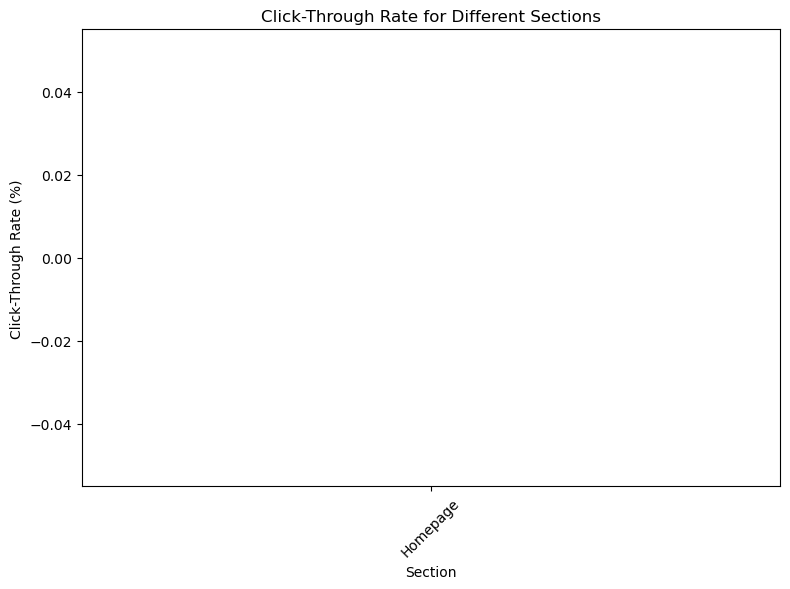

In [25]:
plt.figure(figsize=(8, 6))
plt.bar(click_through_rate.index, click_through_rate.values)
plt.title('Click-Through Rate for Different Sections')
plt.xlabel('Section')
plt.ylabel('Click-Through Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

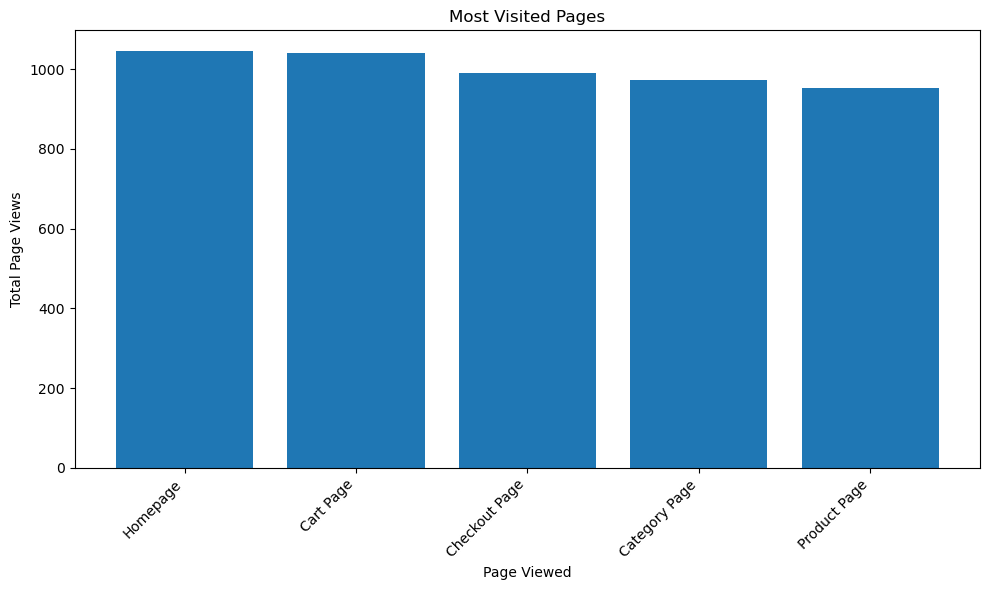

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(page_views_grouped['Page_Viewed'], page_views_grouped['total_page_views'])
plt.title('Most Visited Pages')
plt.xlabel('Page Viewed')
plt.ylabel('Total Page Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

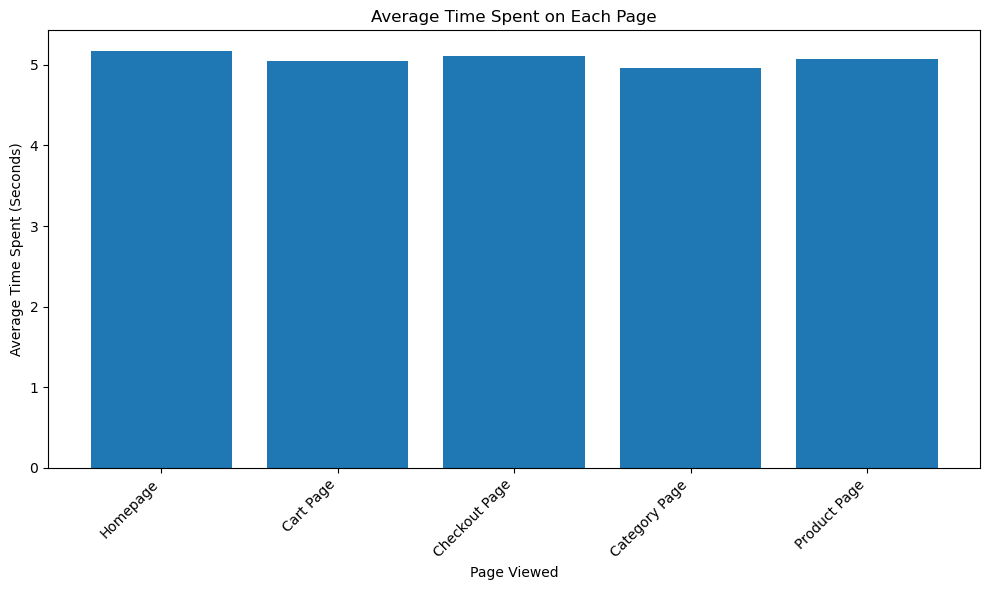

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(page_views_grouped['Page_Viewed'], page_views_grouped['average_time_spent'])
plt.title('Average Time Spent on Each Page')
plt.xlabel('Page Viewed')
plt.ylabel('Average Time Spent (Seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

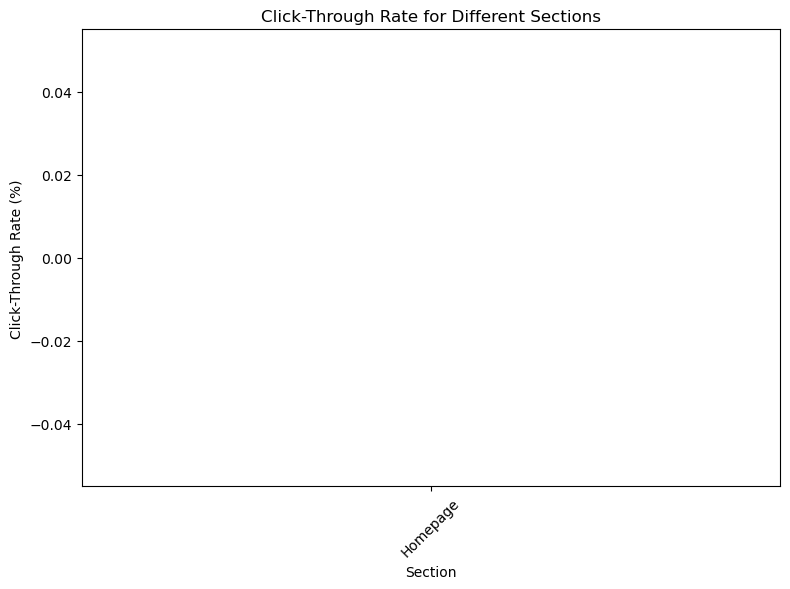

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(click_through_rate.index, click_through_rate.values)
plt.title('Click-Through Rate for Different Sections')
plt.xlabel('Section')
plt.ylabel('Click-Through Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

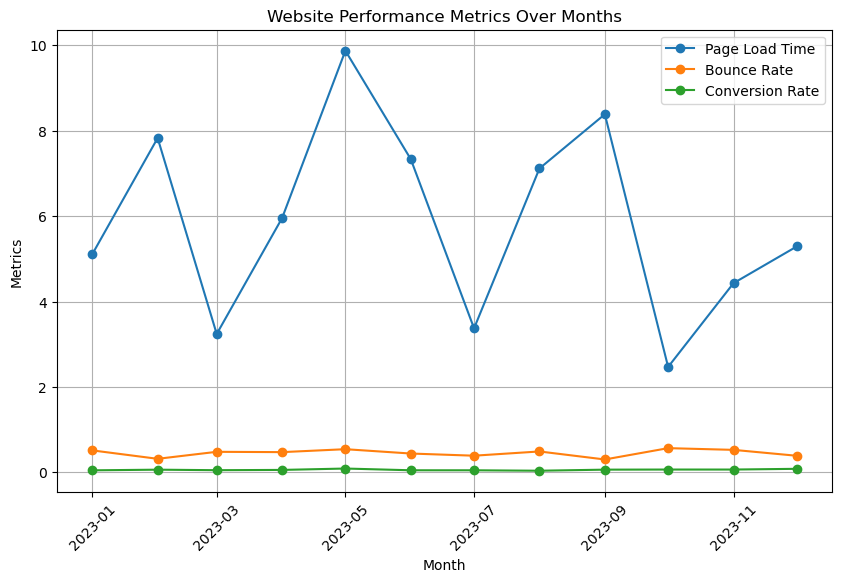

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(performance_df['Month'], performance_df['Page_Load_Time'], marker='o', label='Page Load Time')
plt.plot(performance_df['Month'], performance_df['Bounce_Rate'], marker='o', label='Bounce Rate')
plt.plot(performance_df['Month'], performance_df['Conversion_Rate'], marker='o', label='Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.title('Website Performance Metrics Over Months')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [30]:
total_visitors = len(purchase_df['User_ID'].unique())
total_purchases = len(purchase_df[purchase_df['Transaction_Amount']>0]['User_ID'].unique())
conversion_rate = (total_purchases / total_visitors) * 100
print("Overall Conversion Rate: {:.2f}%".format(conversion_rate))

Overall Conversion Rate: 100.00%


In [31]:
performance_df.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [32]:
user_df.head()

,User_ID,Page_Viewed,Time_Spent_Minutes
0,User_3198,Homepage,9.333333
1,User_126,Category Page,2.800000
2,User_1376,Category Page,2.033333
3,User_1117,Cart Page,5.483333
4,User_3683,Category Page,6.516667


In [33]:
purchase_df.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [34]:
product_sales = purchase_df.groupby('Product_ID')['Transaction_Amount'].sum()

top_selling_products = product_sales.nlargest(5)  
print("Top-Selling Products:")
print(top_selling_products)

Top-Selling Products:
Product_ID
Product_19    7125.056901
Product_17    6711.316153
Product_13    6680.243756
Product_3     6375.983900
Product_20    6359.302691
Name: Transaction_Amount, dtype: float64


In [35]:
interactions_count = user_df.groupby('User_ID')['Page_Viewed'].count().reset_index()
interactions_count.rename(columns={'Page_Viewed': 'Interactions_Count'}, inplace=True)
user_purchase_interactions = pd.merge(purchase_df, interactions_count, on='User_ID', how='left')
user_purchase_interactions['Interactions_Count'].fillna(0, inplace=True)
conversion_by_interactions = user_purchase_interactions.groupby('Interactions_Count')['Transaction_Amount'].count() / len(user_purchase_interactions) * 100

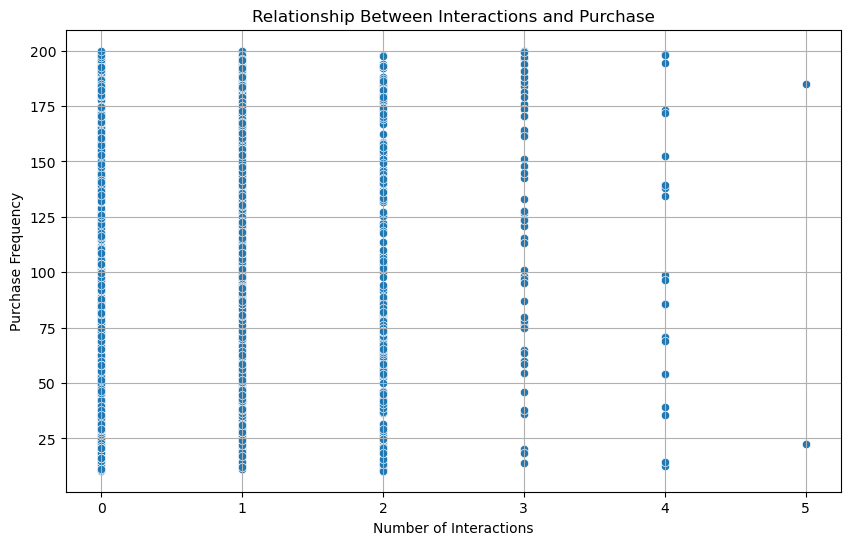

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_purchase_interactions, x='Interactions_Count', y='Transaction_Amount')
plt.title('Relationship Between Interactions and Purchase')
plt.xlabel('Number of Interactions')
plt.ylabel('Purchase Frequency')
plt.grid(True)
plt.show()

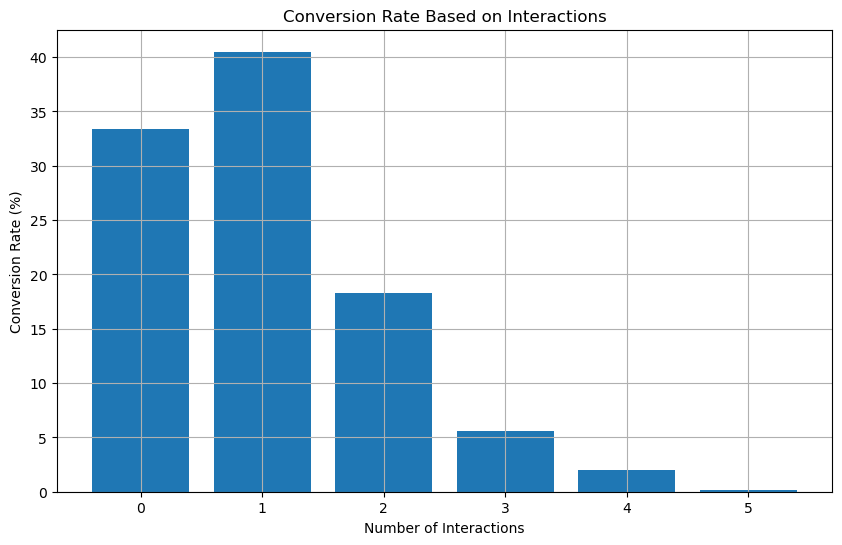

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(conversion_by_interactions.index, conversion_by_interactions.values)
plt.title('Conversion Rate Based on Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.show()

In [38]:
print(user_df['Page_Viewed'].dtype)

if user_df['Page_Viewed'].dtype != 'datetime64[ns]':
    
    user_df = user_df[user_df['Page_Viewed'].str.match(r'\d{4}-\d{2}-\d{2}')]
    
    
    user_df['Page_Viewed'] = pd.to_datetime(user_df['Page_Viewed'])

user_df['Interaction_Month'] = user_df['Page_Viewed'].dt.to_period('M')


object


In [39]:
purchase_df['Purchase_Time'] = pd.to_datetime(purchase_df['Purchase_Time'])

purchase_df['Acquisition_Month'] = purchase_df.groupby('User_ID')['Purchase_Time'].transform('min').dt.to_period('M')

cohorts = purchase_df.groupby('Acquisition_Month')

cohort_revenue = cohorts['Transaction_Amount'].sum()

cohort_transactions = cohorts['User_ID'].nunique()

cohort_avg_transaction = cohort_revenue / cohort_transactions

cohort_ltv = cohort_avg_transaction * cohort_transactions

print(cohort_ltv)

Acquisition_Month
2023-01    18299.498786
2023-02    14805.684535
2023-03    16717.596337
2023-04    15958.567987
2023-05    14861.472820
2023-06    13079.662150
2023-07    12626.260891
Freq: M, dtype: float64
